In [247]:
import torch

In [2]:
features = torch.randn((1, 5))

In [4]:
# Some operations

In [5]:
features.shape

torch.Size([1, 5])

In [ ]:
b = features / features

In [ ]:
b

In [ ]:
b.shape

In [28]:
features = torch.randn((1, 5))

In [29]:
weights= torch.randn((1, 5))

In [30]:
features

tensor([[ 0.4125,  0.0225,  0.8717,  0.0930, -0.2039]])

In [31]:
weights

tensor([[-1.1272, -0.2485,  0.4435,  1.6416, -0.0508]])

In [32]:
features * weights

tensor([[-0.4649, -0.0056,  0.3865,  0.1527,  0.0104]])

In [36]:
torch.mm(features, weights.view(5, 1)).shape

torch.Size([1, 1])

In [29]:
#more examples

In [38]:
# Features are 2 random normal variables
features = torch.randn((1, 2)) #Initialize from a normal distribution
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))

In [32]:
#introduce single neuron - Describe what activation functions are

def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [37]:
y = activation(torch.mm(features, weights.view(2,1)) + bias)
features, weights, bias, y

(tensor([[-1.2989, -0.6097]]),
 tensor([[-0.9822,  0.3475]]),
 tensor([[1.0326]]),
 tensor([[0.8906]]))

In [ ]:
# Stack em up. Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn((n_input, n_hidden))
# Weights for hidden layer to output layer
W2 = torch.randn((n_hidden, n_output))

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [ ]:
h = activation(torch.mm(features, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
print(output)

In [248]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='Greys_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [40]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [249]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              ])
# Download and load the training data 
# Explain a bit about Data loaders - https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
# Explain the concept of batch sizes
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [79]:
# Explain batches,  parallelism, GPU
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


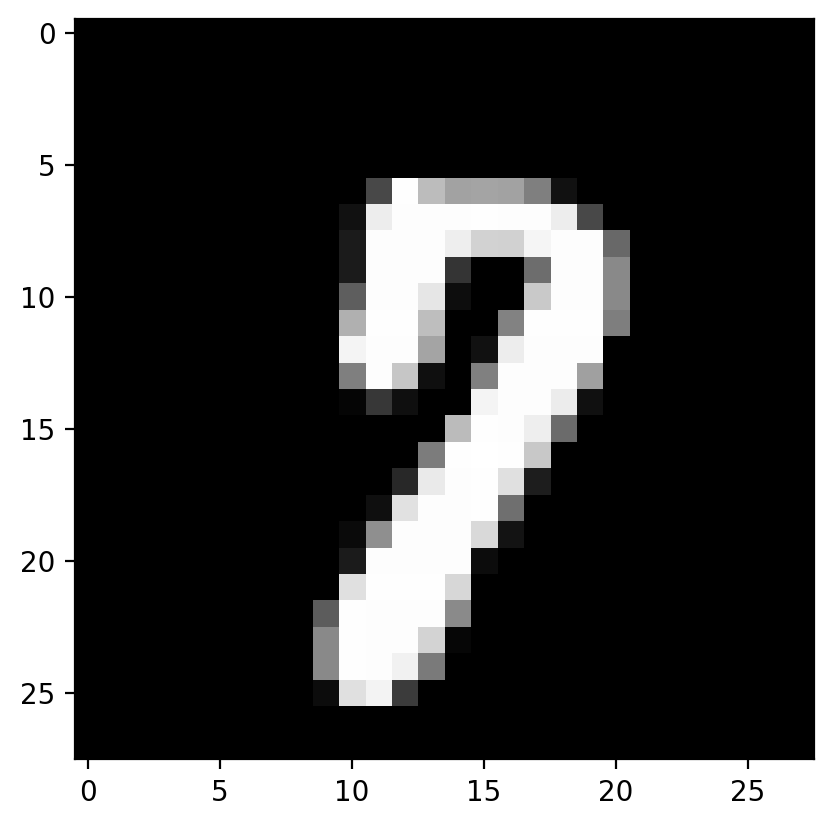

In [80]:
plt.imshow(images[7].squeeze(), cmap='Greys_r');

In [81]:
labels[7]

tensor(7)

In [82]:
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(inputs.shape[1], 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = activation(torch.mm(h, w2) + b2)

In [83]:
out.shape
out[0]

tensor([5.2456e-01, 9.9937e-01, 9.9987e-01, 8.6864e-01, 9.2794e-01, 9.9496e-01,
        3.7535e-05, 9.9974e-01, 1.0000e+00, 8.9771e-01])

In [162]:
from torch import nn

In [160]:
class NetworkFromMatrix(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.sigmoid(x) 
        
        return x

In [108]:
# Let us talk softmax
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [109]:
logits = torch.randn(5, 10)
print(logits.shape)
print(logits[0])

torch.Size([5, 10])
tensor([ 0.6434, -1.3491, -0.7602,  1.4016, -0.1486, -0.3681, -1.1560,  0.4668,
         0.5816, -0.0066])


In [111]:
prob_logits = softmax(logits)
print(prob_logits.shape)
print(prob_logits[0])
print(torch.sum(prob_logits[0]))

torch.Size([5, 10])
tensor([0.1471, 0.0201, 0.0361, 0.3139, 0.0666, 0.0535, 0.0243, 0.1233, 0.1383,
        0.0768])
tensor(1.0000)


In [185]:
# Intorduce nn.functional, relu and softmax activation
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [186]:
print(model.fc1.weight.shape)
print(model.fc1.bias.shape)

torch.Size([128, 784])
torch.Size([128])


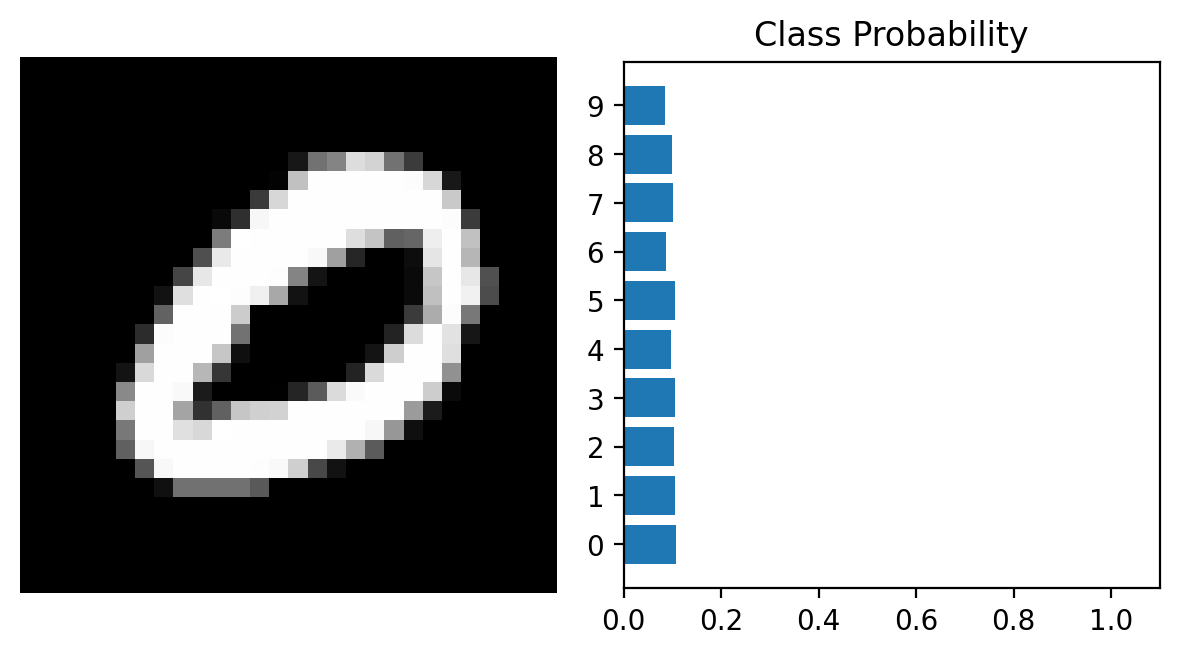

In [189]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

In [159]:
# Revisit the network code once more, and get back to PPT for a discussion of Loss functions and Gradients

In [164]:
# Change to log softmax for more numerical stability
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        
        return x

model = Network()


In [175]:
# Define the loss
criterion = lambda x, y: torch.mean(-x[range(len(y)), y])

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(0.2270, grad_fn=<MeanBackward0>)


In [143]:
# What is grad_fn above? discuss pytorch autograd engine
x = torch.randn(1,1, requires_grad=True)
w = torch.randn(1,1, requires_grad=True)
b = torch.randn(1,1, requires_grad=True)
f = w * x
y = f + b

print(x, w, b)
print(y)

tensor([[-0.3537]], requires_grad=True) tensor([[1.0843]], requires_grad=True) tensor([[-0.8218]], requires_grad=True)
tensor([[-1.2054]], grad_fn=<AddBackward0>)


In [144]:
print(w.grad)

None


To calculate the gradients, you need to run the `.backward` method on a Variable, `y` for example. This will calculate the gradient for `y` with respect to `w` and `b`

$$
\frac{\partial y}{\partial w} = \frac{\partial y}{\partial f}\frac{\partial f}{\partial w} = x
$$

In [145]:
y.backward()
w.grad

tensor([[-0.3537]])

In [ ]:
# discuss optimizer module that updates the weights

In [153]:
from torch import optim
optimizer = optim.SGD([w], lr=0.1)
print(w)
optimizer.step()
print(w)

tensor([[1.0843]], requires_grad=True)
tensor([[1.1196]], requires_grad=True)


In [251]:
#putting it all together
from torch import optim

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        
        return x

model = Network()

criterion = lambda x, y: torch.mean(-x[range(len(y)), y])
#criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss at {e}: {running_loss/len(trainloader)}")

Training loss at 0: 2.254305442004824
Training loss at 1: 1.973656257967959
Training loss at 2: 1.2662030195376512
Training loss at 3: 0.7911116558351496
Training loss at 4: 0.5994854113186346
Training loss at 5: 0.506053429549691
Training loss at 6: 0.4518747577852786
Training loss at 7: 0.415921337759571
Training loss at 8: 0.39037871522817025
Training loss at 9: 0.3713403098634692
Training loss at 10: 0.3562971933452941
Training loss at 11: 0.34383535093621914
Training loss at 12: 0.333301189039816
Training loss at 13: 0.32368000323520796
Training loss at 14: 0.315477940073209
Training loss at 15: 0.3077334293773942
Training loss at 16: 0.3006664781825248
Training loss at 17: 0.29411312137077106
Training loss at 18: 0.2877053090933162
Training loss at 19: 0.281917381841046


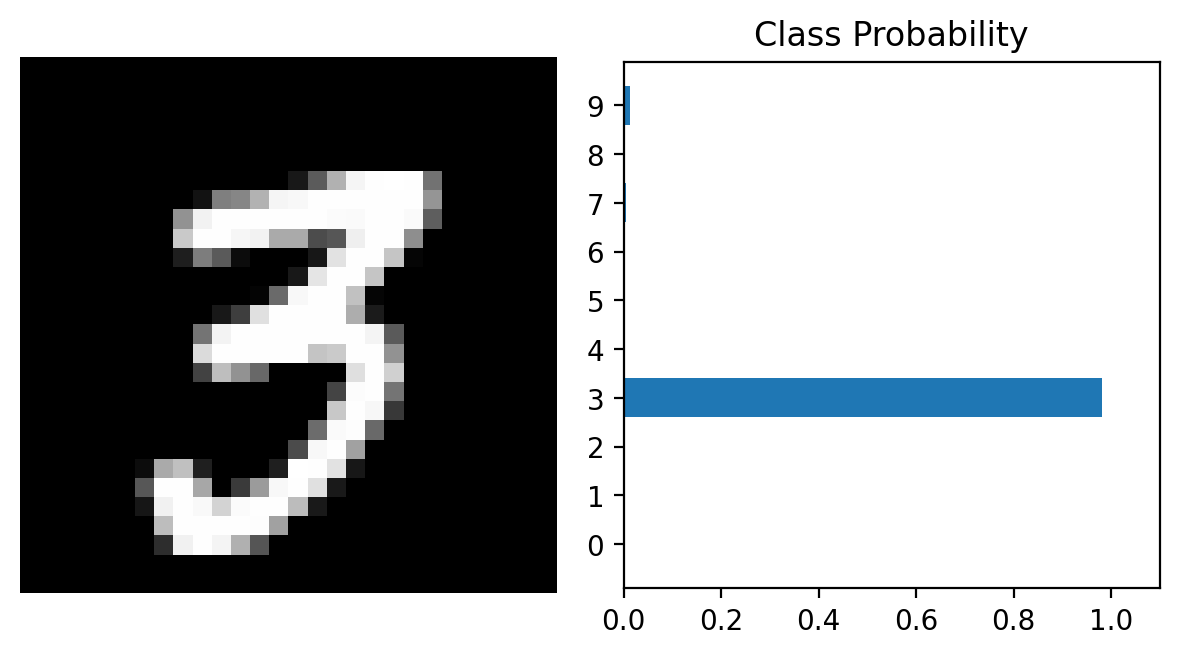

In [255]:
%matplotlib inline

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

In [252]:
# But we don't test on already seen data
testSet = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=64, shuffle=True)

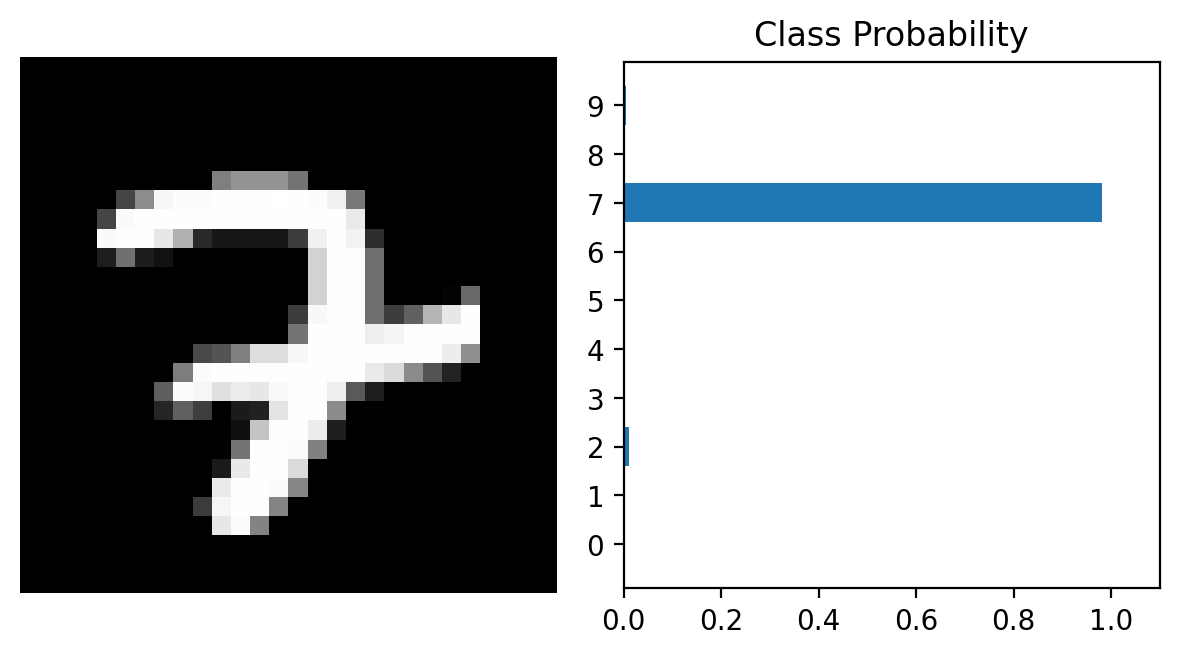

In [254]:
%matplotlib inline

images, labels = next(iter(testLoader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

In [221]:
epochs = 30
model = Network()
optimizer = optim.SGD(model.parameters(), lr=0.003)

train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        tot_test_loss = 0
        test_correct = 0  # Number of correct predictions on the test set
        
        with torch.no_grad():
            for images, labels in testLoader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                
                output = model(images)
                loss = criterion(output, labels)
                
                tot_test_loss += loss.item()

                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                test_correct += equals.sum().item()
                
        # Get mean loss to enable comparison between train and test sets
        train_loss = running_loss / len(trainloader)
        test_loss = tot_test_loss / len(testLoader)

        # At completion of epoch
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(test_correct / len(testLoader.dataset)))

Training loss: 2.2542896120787175
Epoch: 1/30..  Training Loss: 2.254..  Test Loss: 2.176..  Test Accuracy: 0.498
Training loss: 1.9858575944961516
Epoch: 2/30..  Training Loss: 1.986..  Test Loss: 1.700..  Test Accuracy: 0.593
Training loss: 1.3427155591023248
Epoch: 3/30..  Training Loss: 1.343..  Test Loss: 0.991..  Test Accuracy: 0.773
Training loss: 0.8216091980303782
Epoch: 4/30..  Training Loss: 0.822..  Test Loss: 0.665..  Test Accuracy: 0.833
Training loss: 0.613010131696394
Epoch: 5/30..  Training Loss: 0.613..  Test Loss: 0.536..  Test Accuracy: 0.857
Training loss: 0.5180654498115023
Epoch: 6/30..  Training Loss: 0.518..  Test Loss: 0.467..  Test Accuracy: 0.873
Training loss: 0.46318678958202475
Epoch: 7/30..  Training Loss: 0.463..  Test Loss: 0.426..  Test Accuracy: 0.882
Training loss: 0.4267877283603398
Epoch: 8/30..  Training Loss: 0.427..  Test Loss: 0.395..  Test Accuracy: 0.888
Training loss: 0.40035184812761826
Epoch: 9/30..  Training Loss: 0.400..  Test Loss: 0.3

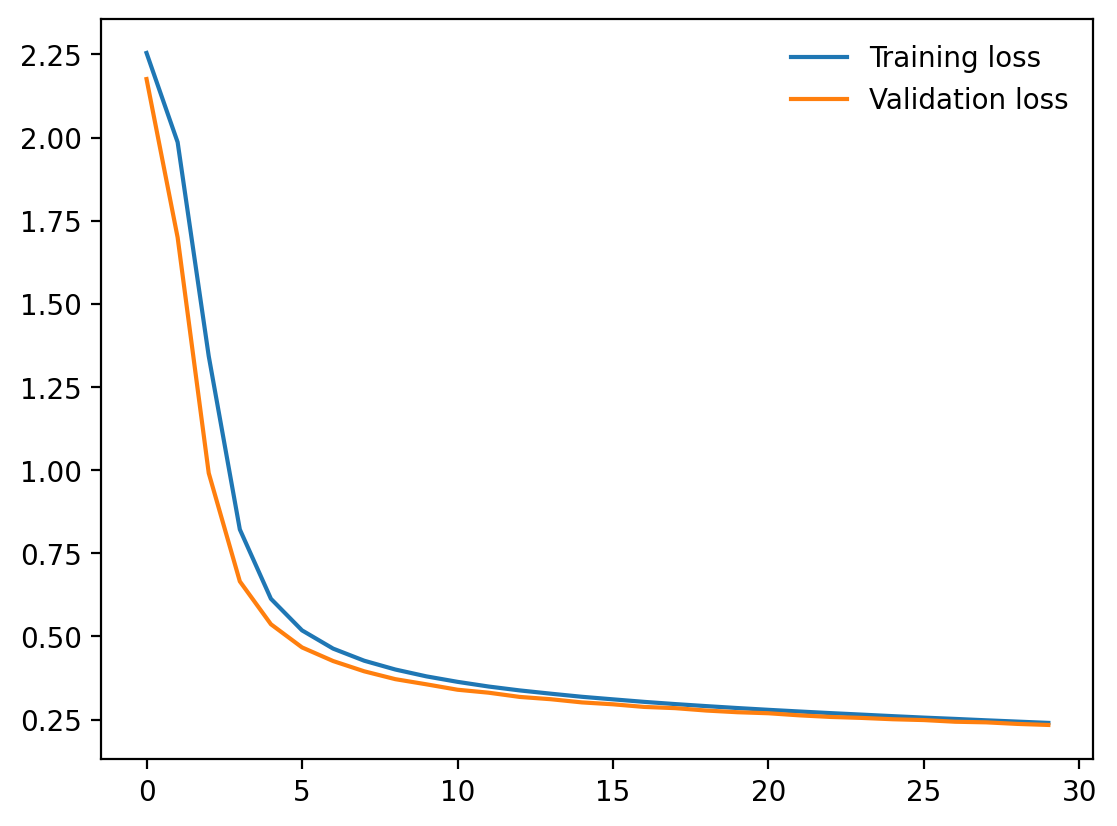

In [222]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [236]:
# https://github.com/pytorch/pytorch/issues/77799 - show graph for performance on data size on GPU